# KASEN MODEL FOR SN Ia COMPANION INTERACTION 

### this is code that takes a set of simulated spectra produced by Dan Kasen according to Kasen 2010 http://adsabs.harvard.edu/abs/2010ApJ...708.1025K and integrates them through the Kepler R filter to generate lightcurves of the first 10 days os a SN explosion.  $$ $$  The simulations reproduce the effect of a companion in a single degenerate SN Ia explosion. The companion is assumed to be in Roche lobe overflow, thus its distance is determined by its mass. Three companion cases are modelled:  $$ $$ a 2 $M_\odot$ Main Sequence (MS) star,  $$ $$ a 6 $M_\odot$ MS star, and  $$ $$ a 1 $M_\odot$ Red Giant (RG).  $$ $$  Note the important note about the lightcurve shape in the last paragraph of this notebook

Time is sampled between 0.05 and 0.95 days after explosion with 0.1 days sampling intervals

In [2]:

import os,sys,glob
import numpy as np
import pylab as pl
import pandas as pd
from scipy.interpolate import interp1d
from matplotlib.ticker import ScalarFormatter
formatter=ScalarFormatter()
formatter.set_scientific(True)
formatter.set_powerlimits((-2,2))

%pylab inline


Populating the interactive namespace from numpy and matplotlib


//anaconda/envs/GEOP/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


### 40 viewing angles are simulated, between 0 and 180 degrees. $$ $$ 0 degree has the companion between us ant the WD. $$ $$ 180 has the WD between us and the companion. $$ $$ The viewing angle sampled regularly in cosine space, to give uniform elements of surface area on the sphere. 

In [3]:
angles = [167.1616, 157.6685, 151.0451, 145.5886,
          140.8052, 136.469, 132.4543, 128.6823,
          125.0997, 121.6683, 118.3595, 115.1508, 
          112.0244, 108.9657, 105.9621, 103.0030, 
          100.0787,  97.1808,  94.3013,  91.4326,  
          88.5675,  85.6989,  82.8193,  79.9214,  
          76.9972,  74.0380,  71.0345,  67.9757,  
          64.8494,  61.6407,  58.3318,  54.9004,  
          51.3179,  47.5459,  43.5312,  39.1950,  
          34.4115,  28.9550,  22.3317,  12.8386]

smoothing function, hanning window

In [4]:
def smooth(x,window_len=11):
        if x.ndim != 1:
            print("smooth only accepts 1 dimension arrays.")
            raise ValueError
        if x.size < window_len:
            print("Input vector needs to be bigger than window size.")
            raise ValueError
                
        if window_len<3:
                return x

        s = np.r_[2 * x[0] - x[window_len - 1::-1], x,
                  2 * x[-1] - x[-1:-window_len:-1]]

        w = eval('numpy.hanning(window_len)')
        y = np.convolve(w / w.sum(), s, mode='same')
        return y[window_len:-window_len+1]

alphas and colors for plotting

In [5]:
alphas={}
for mu in angles:
    alphas[mu]=1.0 - mu / max(angles)
allcolors=[ "Teal",  "YellowGreen", "Plum",  "SlateBlue", 
           "RoyalBlue", "Tomato", "RosyBrown", "Brown",  
           "SeaGreen",  "Crimson", "Cyan", "DarkBlue", 
           "DarkCyan", "DarkGreen", "DarkGray", "DarkGoldenRod", 
           "DarkKhaki", "DarkMagenta", "DarkOliveGreen", "DarkOrange", 
           "DarkOrchid", "DarkRed", "Olive","DarkSlateBlue", 
           "DarkSlateGray", "DarkTurquoise",  "Purple", "DeepPink", 
           "DeepSkyBlue", "DimGray", "DodgerBlue", "FireBrick", 
           "Turquoise", "ForestGreen", "Fuchsia", "OliveDrab", 
           "Gold", "GoldenRod", "Gray", "Green", "GreenYellow",
           "IndianRed", "Indigo",  "SteelBlue", "Khaki", "Lavender",  
           "LawnGreen","SpringGreen",  "Lime", "LimeGreen", "Magenta", 
           "Maroon", "MediumAquaMarine", "MediumBlue", "MediumOrchid", 
           "MediumPurple", "MediumSeaGreen", "MediumSlateBlue", 
           "MediumSpringGreen", "MediumTurquoise", "MediumVioletRed", 
           "MidnightBlue",  "Navy",  "OliveDrab", "Orange", "OrangeRed", 
           "Orchid",  "Peru", "Pink", "SlateBlue", "Red", "RosyBrown", 
           "RoyalBlue", "SaddleBrown", "Salmon", "SandyBrown", "Sienna", 
           "Silver", "SkyBlue", "Purple", "SlateGray", "SpringGreen", 
           "SteelBlue", "Tan", "Turquoise"]

### The filter is Kepler R: "Kepler-Kepler.K.dat" 

In [6]:
!ls

Kasen_excess.ipynb
Kasen_excess.py
Untitled.ipynb
a2e12_Kepler.dat
a2e12_Kepler_smoothed.dat
a2e12_Kepler_smoothed_baselineremoved.dat
a2e12_g.csv
a2e12_g_smoothed.csv
a2e12_g_smoothed_baselineremoved.csv
a2e12_i.csv
a2e12_i_smoothed.csv
a2e12_i_smoothed_baselineremoved.csv
a2e12_r.csv
a2e12_r_smoothd.csv
a2e12_r_smoothed.csv
a2e12_r_smoothed_baselineremoved.csv
a2e12_r_smoothed_baselineremoved.dat
a2e13_Kepler.dat
a2e13_Kepler_smoothed.dat
a2e13_Kepler_smoothed_baselineremoved.dat
a2e13_g.csv
a2e13_g_smoothed.csv
a2e13_g_smoothed_baselineremoved.csv
a2e13_i.csv
a2e13_i_smoothed.csv
a2e13_i_smoothed_baselineremoved.csv
a2e13_r.csv
a2e13_r_smoothd.csv
a2e13_r_smoothed.csv
a2e13_r_smoothed_baselineremoved.csv
a2e13_r_smoothed_baselineremoved.dat
a5e11_Kepler.dat
a5e11_Kepler_g.dat
a5e11_Kepler_smoothed.dat
a5e11_Kepler_smoothed_baselineremoved.dat
a5e11_g.csv
a5e11_g_smoothed.csv
a5e11_g_smoothed_baselineremoved.csv
a5e11_i.csv
a5e11_i_smoothed.csv
a5e11_i_smoothed_baselineremoved.csv
a5

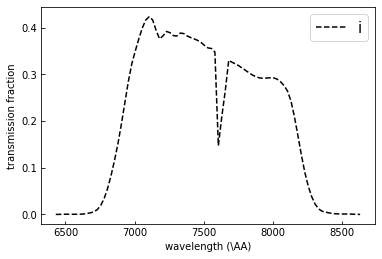

In [38]:
myfilter = {}
filtfunc = {}

for f in ['i']: #['g','r','i']:
    filterfile = '%s.txt'%f 
    #'Kepler-Kepler.K.dat'

        #used B filter for testing and comparing with Kasen 2010
    #filterfile = '/Users/fbianco/science/Dropbox/idl2/B_filter.dat'

    myfilter[f]=np.loadtxt(filterfile,unpack=True)
    myfilter[f][0] *= 10
    filtfunc[f]=interp1d(myfilter[f][0], myfilter[f][1],
                         bounds_error=False, fill_value=0.0)
    pl.plot(myfilter[f][0],myfilter[f][1],'k--',label="%s"%f)
    pl.xlabel(r"wavelength (\AA)")
    pl.ylabel("transmission fraction")
    pl.legend(prop={'size':15})

A distance string goes into the file names and identifies the companion. It can be: 'a5e11', that is your 2Msun MS star, 'a2e12', your 6Msun MS star, or 'a2e13', your Red Giant.

## 2 $M_\odot$ MS companion

In [39]:
dist = 'a5e11'
spdir = 'companions/companion_' + dist

#### filtering, integrating, plotting the spectra here

2 M_sun MS companion
each phase is plotted in a box in each plot arrays
for each phase the spectrum at the narrowest and largest viewing angles are plotted
(only the narrowest is visible thought due to scaling)


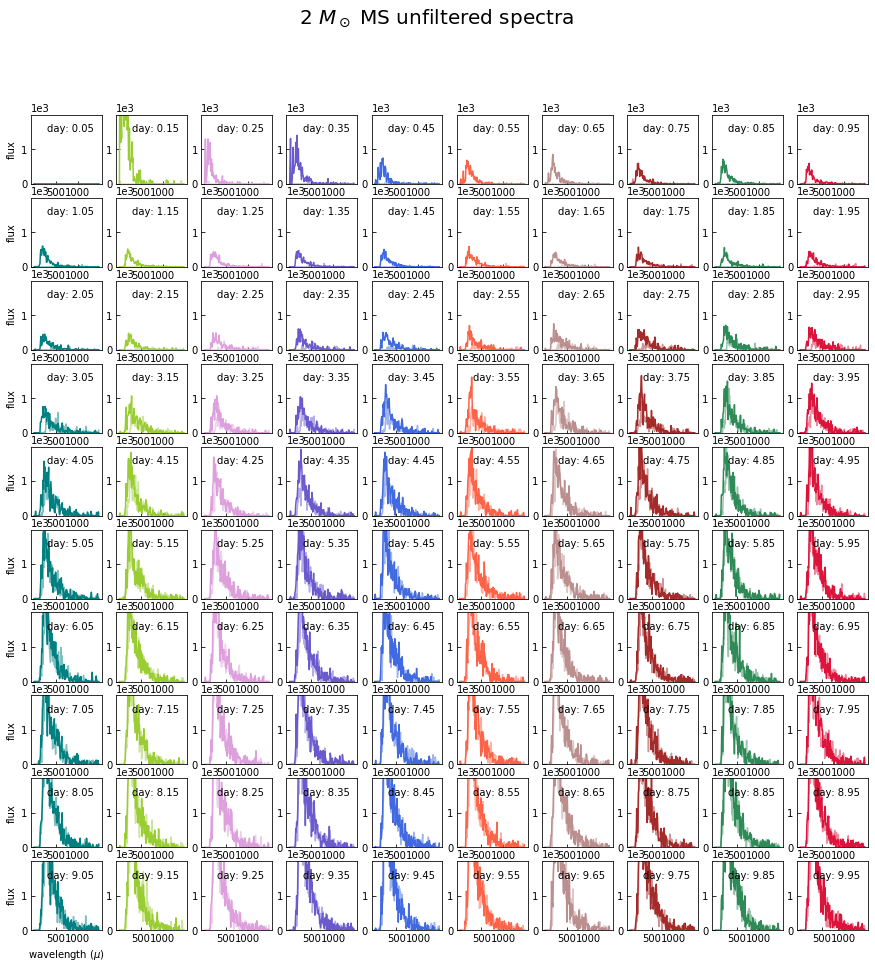

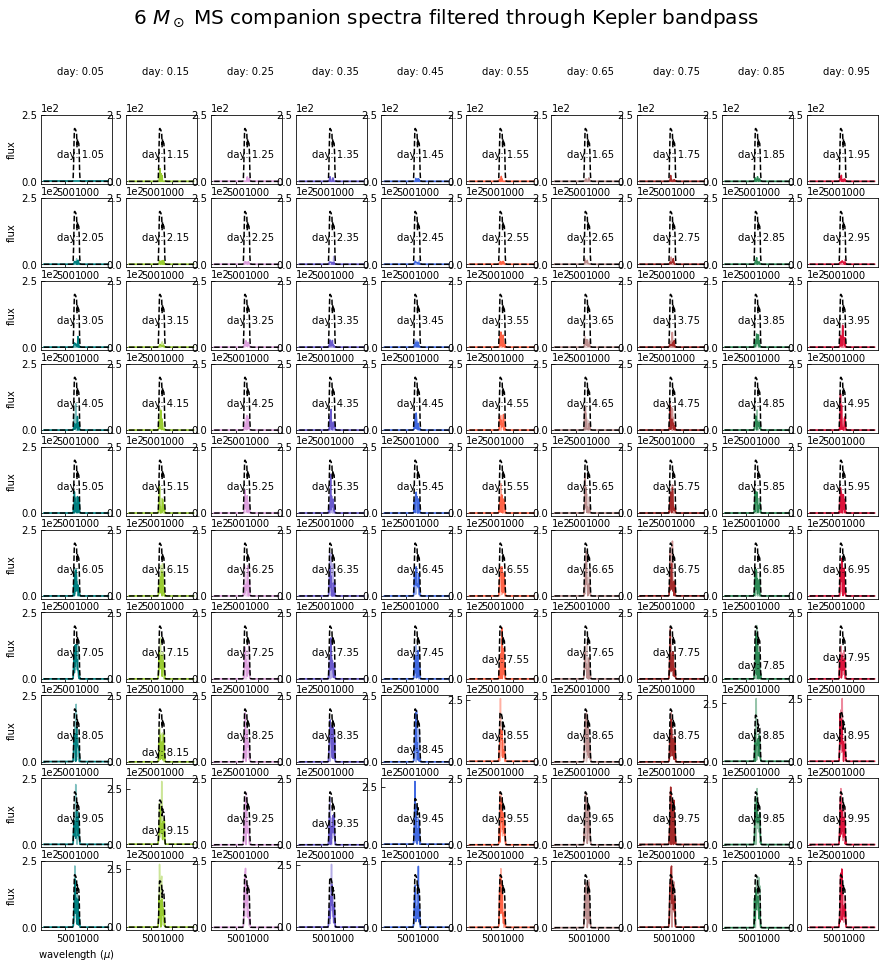

In [40]:
print ("2 M_sun MS companion")
print ("each phase is plotted in a box in each plot arrays")
print ("for each phase the spectrum at the narrowest and largest viewing angles are plotted")
print ("(only the narrowest is visible thought due to scaling)") 

fig1=pl.figure(figsize=(15,15))  
fig1.suptitle(r"2 $M_\odot$ MS unfiltered spectra", fontsize=20)
fig2=pl.figure(figsize=(15,15))
fig2.suptitle(r"6 $M_\odot$ MS companion spectra filtered through Kepler bandpass", 
              fontsize=20)
lcva5e11={'epoch':[], 'flux':{}}


for mu in angles:
    lcva5e11['flux'][mu] = []
    
# for each epoch read in a spectrum for each angle
for t,epoch in enumerate(np.arange(0.05,10,0.1)):
    lcva5e11['epoch'].append(epoch)
    a5e11spectra={'w': np.arange(51,14852,100)}
    allspectrafiles =  np.array(glob.glob(spdir + "/optical_t%06.2f_I3.spec.*"%epoch))
    
    for mu in angles:
        thisf = [ff.strip()  for ff in allspectrafiles if '%.4f'%mu in ff]
        a5e11spectra[mu] = np.loadtxt(thisf[0], usecols=(1,))
        
    ax1=fig1.add_subplot(10, 10, t+1)
    ax2=fig2.add_subplot(10, 10, t+1)            
    ax1.text(300, 1500,"day: %.2f"%epoch)
    ax2.text(300, 400,"day: %.2f"%epoch)
    
    for k in a5e11spectra:
        if k == 'w':
            continue
        if k == 167.1616:    
            ax1.plot(a5e11spectra['w'] * 0.1,
                     a5e11spectra[k], alpha=0.5, color=allcolors[t%10])
            ax2.plot(a5e11spectra['w'] * 0.1,
                     a5e11spectra[k] * filtfunc[f](a5e11spectra['w']),
                     alpha=0.5, color=allcolors[t%10])

        if k == 12.8386:    
            ax1.plot(a5e11spectra['w'] * 0.1,
                     a5e11spectra[k],alpha=1.0, color=allcolors[t%10])
            ax2.plot(a5e11spectra['w'] * 0.1,
                     a5e11spectra[k] * filtfunc[f](a5e11spectra['w']),
                     alpha=1, color=allcolors[t%10])
    
        #integrating under the filter to get the lightcurve datapoint
        lcva5e11['flux'][k].append(sum(a5e11spectra[k] *
                                       filtfunc[f](a5e11spectra['w'])))
       
    ax1.set_ylim(0, 2000)
    ax1.set_yticks([0, 1000])
    ax1.set_xticks([500, 1000])
    #ax1.xaxis.set_major_formatter(formatter)
    ax1.yaxis.set_major_formatter(formatter)

    ax2.plot(a5e11spectra['w'] * 0.1, 500 * filtfunc[f](a5e11spectra['w']),
             'k--', alpha=1)
    #ax2.set_ylim(0,500)
    ax2.set_yticks([0, 250])
    ax2.set_xticks([500, 1000])
    #ax2.xaxis.set_major_formatter(formatter)
    ax2.yaxis.set_major_formatter(formatter)
    #ax2.set_xlim([300,1000])
 
    if (t) % 10 == 0:
        ax1.set_ylabel("flux")
        ax2.set_ylabel("flux")

    if (t) / 10 == 9:
        ax1.set_xlabel(r"wavelength ($\mu$)")
        ax2.set_xlabel(r"wavelength ($\mu$)")
        


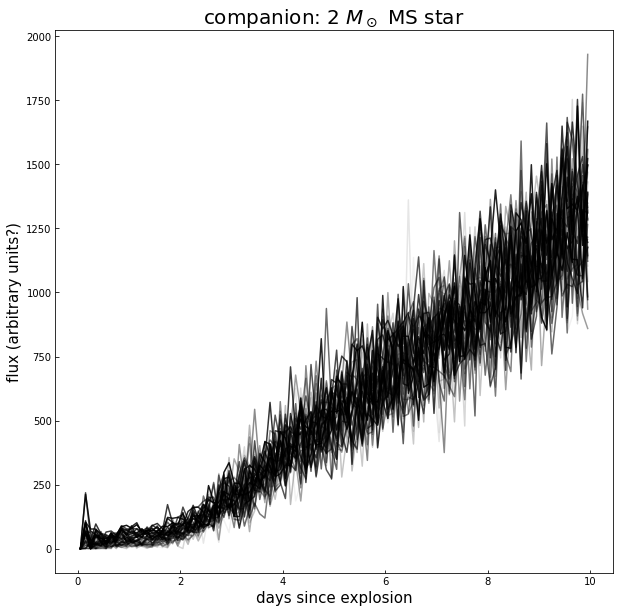

In [41]:
pl.figure(figsize=(10,10))
for i,mu in enumerate(angles):
    pl.plot(lcva5e11['epoch'],lcva5e11['flux'][mu], 
            'k', alpha=1.0-mu/max(angles))
pl.title(r"companion: 2 $M_\odot$ MS star", fontsize=20)
pl.ylabel("flux (arbitrary units?)", fontsize=15)
pl.xlabel("days since explosion", fontsize=15);


printing file out

In [42]:
lcvs = {'phase': lcva5e11['epoch']}
for mu in angles:
    lcvs[mu] = lcva5e11['flux'][mu]
lcvs = pd.DataFrame(lcvs)

In [43]:
lcvs.head()

,phase,167.1616,157.6685,151.0451,145.5886,140.8052,136.469,132.4543,128.6823,125.0997,...,58.3318,54.9004,51.3179,47.5459,43.5312,39.195,34.4115,28.955,22.3317,12.8386
0,0.05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.15,31.989566,0.000000,9.645043,32.124018,60.857405,32.322543,32.635167,38.705501,54.361662,...,218.413762,67.241545,64.358556,109.174117,63.687433,56.622188,60.052597,102.821492,212.216464,98.152393
2,0.25,0.000000,0.000000,23.497173,0.048159,0.000000,56.294515,0.000000,42.680407,48.586910,...,34.240893,62.325815,0.004426,0.000000,0.000000,17.981762,35.289514,76.424433,67.918302,30.054160
3,0.35,27.725912,21.449463,0.316033,0.012787,14.755111,0.000000,20.829967,0.727845,0.000000,...,20.838019,17.145870,73.786354,73.911242,55.140889,70.335900,96.113278,76.573628,54.294799,45.946189
4,0.45,1.085692,13.215602,13.569648,9.061820,2.042240,0.582634,7.761559,13.254693,3.567783,...,11.845431,10.572541,38.519419,59.268496,21.962532,29.758242,57.649122,52.598066,25.976271,39.236036


In [44]:
lcvs.to_csv("%s_%s.csv"%(dist, f), index=False)

## 6 $M_\odot$ MS companion

In [45]:
dist = 'a2e12'
spdir = 'companions/companion_' + dist

6 M_sun MS companion
each phase is lpottted in a box in each plot arrays
for each phase the spectrum at the narrowest and largest viewing angles are plotted
(only the narrowest is visible thought due to scaling)


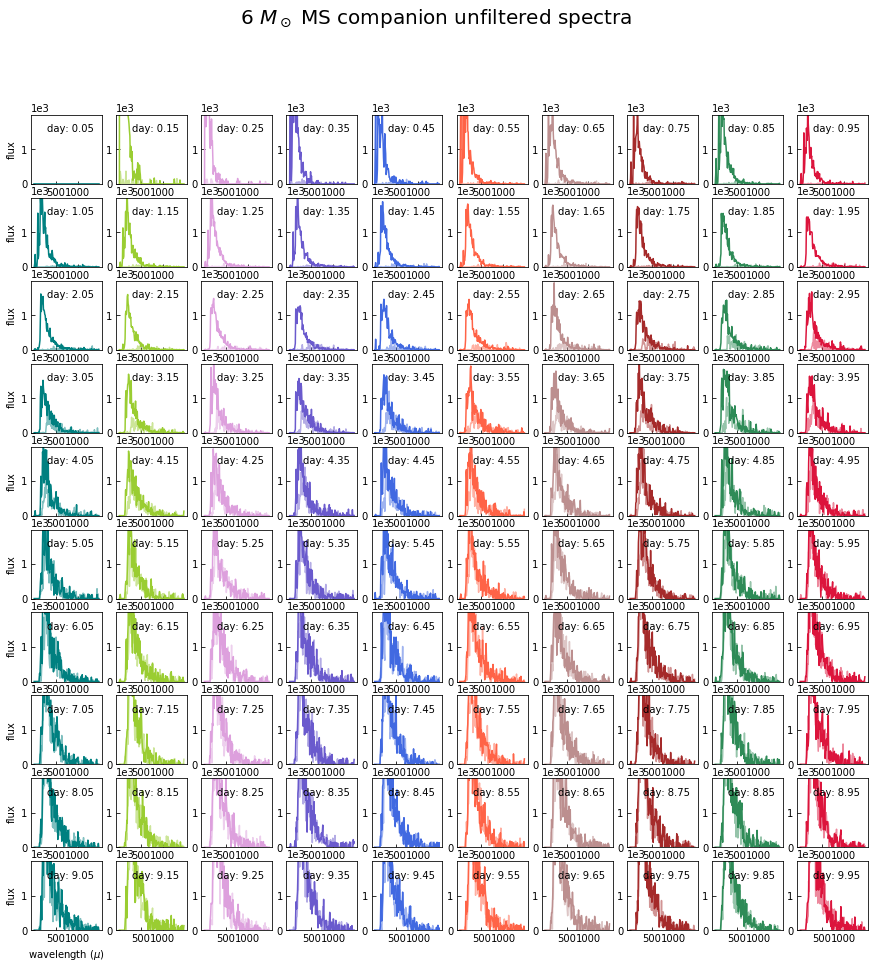

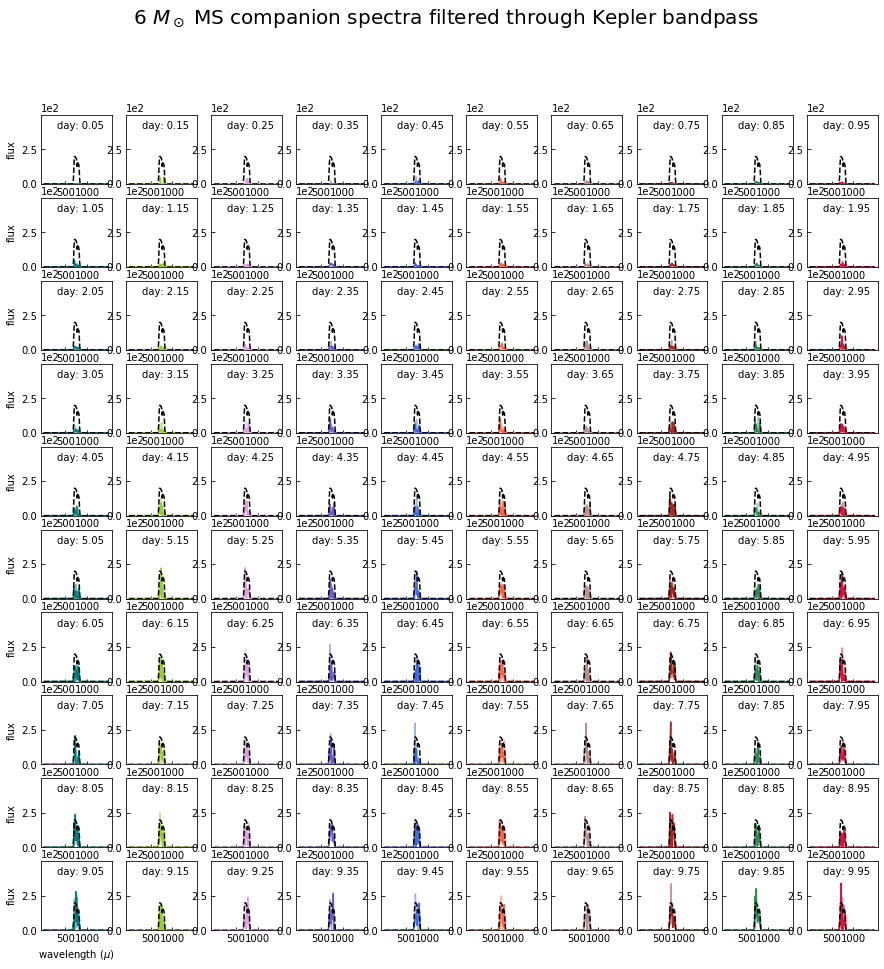

In [46]:
print ("6 M_sun MS companion")
print ("each phase is lpottted in a box in each plot arrays")
print ("for each phase the spectrum at the narrowest and largest viewing angles are plotted") 
print ("(only the narrowest is visible thought due to scaling)") 

fig1 = pl.figure(figsize=(15,15))  
fig1.suptitle(r"6 $M_\odot$ MS companion unfiltered spectra", fontsize=20)
fig2 = pl.figure(figsize=(15,15))
fig2.suptitle(r"6 $M_\odot$ MS companion spectra filtered through Kepler bandpass", 
              fontsize=20)
lcva2e12 = {'epoch':[], 'flux':{}}
for mu in angles:
    lcva2e12['flux'][mu] = []
    
for t,epoch in enumerate(np.arange(0.05, 10.0, 0.1)):
    lcva2e12['epoch'].append(epoch)
    a2e12spectra={'w': np.arange(51, 14852, 100)}
    allspectrafiles=  np.array(glob.glob(spdir + "/optical_t%06.2f_I3.spec.*"%epoch))

    for mu in angles:
        thisf= [ff.strip()  for ff in allspectrafiles if '%.4f'%mu in ff]
        a2e12spectra[mu] = np.loadtxt(thisf[0], usecols=(1,))

    ax1=fig1.add_subplot(10, 10, t+1)
    ax2=fig2.add_subplot(10, 10, t+1)            
    ax1.text(300, 1500, "day: %.2f"%epoch)
    ax2.text(300, 400, "day: %.2f"%epoch)

    
    for k in a2e12spectra:
        if k == 'w':
            continue
        if k == 167.1616:    
            ax1.plot(a2e12spectra['w'] * 0.1, a2e12spectra[k],
                     alpha=0.5, color=allcolors[t%10])
            ax2.plot(a2e12spectra['w'] * 0.1, 
                     a2e12spectra[k] * filtfunc[f](a2e12spectra['w']),
                     alpha=0.5, color=allcolors[t%10])

        if k == 12.8386:    
            ax1.plot(a2e12spectra['w'] * 0.1, a2e12spectra[k],
                     alpha=1.0, color=allcolors[t%10])
            ax2.plot(a2e12spectra['w'] * 0.1,
                     a2e12spectra[k] * filtfunc[f](a2e12spectra['w']),
                     alpha=1, color=allcolors[t%10])
  
        #integrating under the filter to get the lightcurve datapoint
        lcva2e12['flux'][k].append(sum(a2e12spectra[k] * 
                                       filtfunc[f](a2e12spectra['w'])))

    ax1.set_ylim(0, 2000)
    ax1.set_yticks([0, 1000])
    ax1.set_xticks([500, 1000])
    #ax1.xaxis.set_major_formatter(formatter)
    ax1.yaxis.set_major_formatter(formatter)

    ax2.plot(a2e12spectra['w'] * 0.1, 
             500 * filtfunc[f](a2e12spectra['w']), 'k--', alpha=1)
    ax2.set_ylim(0, 500)
    ax2.set_yticks([0, 250])
    ax2.set_xticks([500, 1000])
    #ax2.xaxis.set_major_formatter(formatter)
    ax2.yaxis.set_major_formatter(formatter)
    
    if (t) % 10 == 0:
        ax1.set_ylabel("flux")
        ax2.set_ylabel("flux")

    if (t) / 10 == 9:
        ax1.set_xlabel(r"wavelength ($\mu$)")
        ax2.set_xlabel(r"wavelength ($\mu$)")
        


#### plotting the lightcurves, one for each angle. The color intensity increases as the angle decreases

Text(0.5,0,'days since explosion')

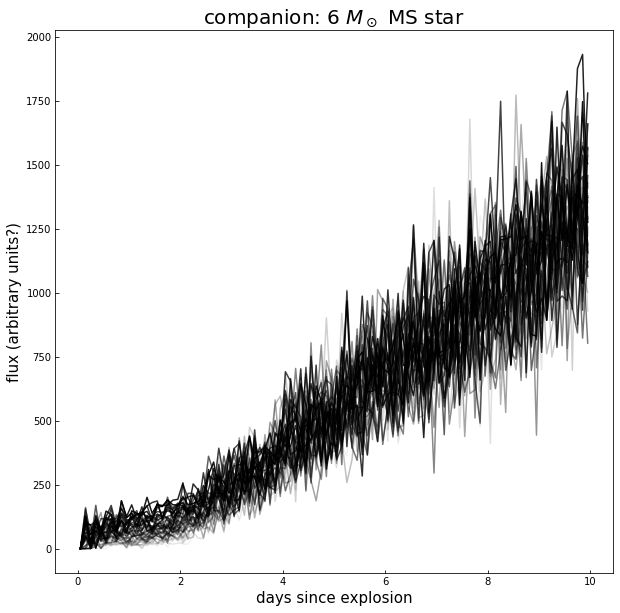

In [47]:
pl.figure(figsize=(10,10))
for i, mu in enumerate(angles):
    pl.plot(lcva2e12['epoch'], lcva2e12['flux'][mu], 'k', 
            alpha=1.0 - mu / max(angles))
pl.title(r"companion: 6 $M_\odot$ MS star", fontsize=20)
pl.ylabel("flux (arbitrary units?)", fontsize=15)
pl.xlabel("days since explosion", fontsize=15)

printing file out

In [48]:
lcvs = {'phase': lcva2e12['epoch']}
for mu in angles:
    lcvs[mu] = lcva2e12['flux'][mu]
lcvs = pd.DataFrame(lcvs)

In [49]:
lcvs.to_csv("%s_%s.csv"%(dist, f), index=False)

pd.read_csv("%s_%s.csv"%(dist, f)).head()

,phase,167.1616,157.6685,151.0451,145.5886,140.8052,136.469,132.4543,128.6823,125.0997,...,58.3318,54.9004,51.3179,47.5459,43.5312,39.195,34.4115,28.955,22.3317,12.8386
0,0.05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.15,57.222997,46.120313,36.323310,0.000000,42.803144,26.589913,47.206935,40.982752,111.316208,...,125.094015,35.517895,83.754604,44.297452,155.634179,104.084397,130.538335,61.051510,121.347599,93.647068
2,0.25,5.549650,0.000000,37.782766,0.000000,0.155206,32.296096,26.835117,1.150551,0.000000,...,22.128804,58.631493,17.514215,73.398582,53.685014,91.891843,22.021737,56.261554,7.410641,93.182782
3,0.35,24.472239,38.400865,0.000000,38.145847,44.718429,48.450713,54.948566,52.816007,45.164091,...,169.031551,64.716337,122.230914,114.650584,111.923757,106.912281,20.128054,85.190650,129.839253,1.007429
4,0.45,62.096579,0.000000,0.064196,14.854336,33.191765,0.008339,0.817786,69.266077,82.944231,...,30.930410,117.059534,35.423536,60.686276,63.614424,79.754537,64.346334,53.232324,77.806137,72.045947


## 1 $M_\odot$ RG companion

In [50]:
dist = 'a2e13'
spdir = 'companions/companion_' + dist


1 M_sun RG companion
each phase is lpottted in a box in each plot arrays
for each phase the spectrum at the narrowest and largest viewing angles are plotted
(only the narrowest is visible thought due to scaling)


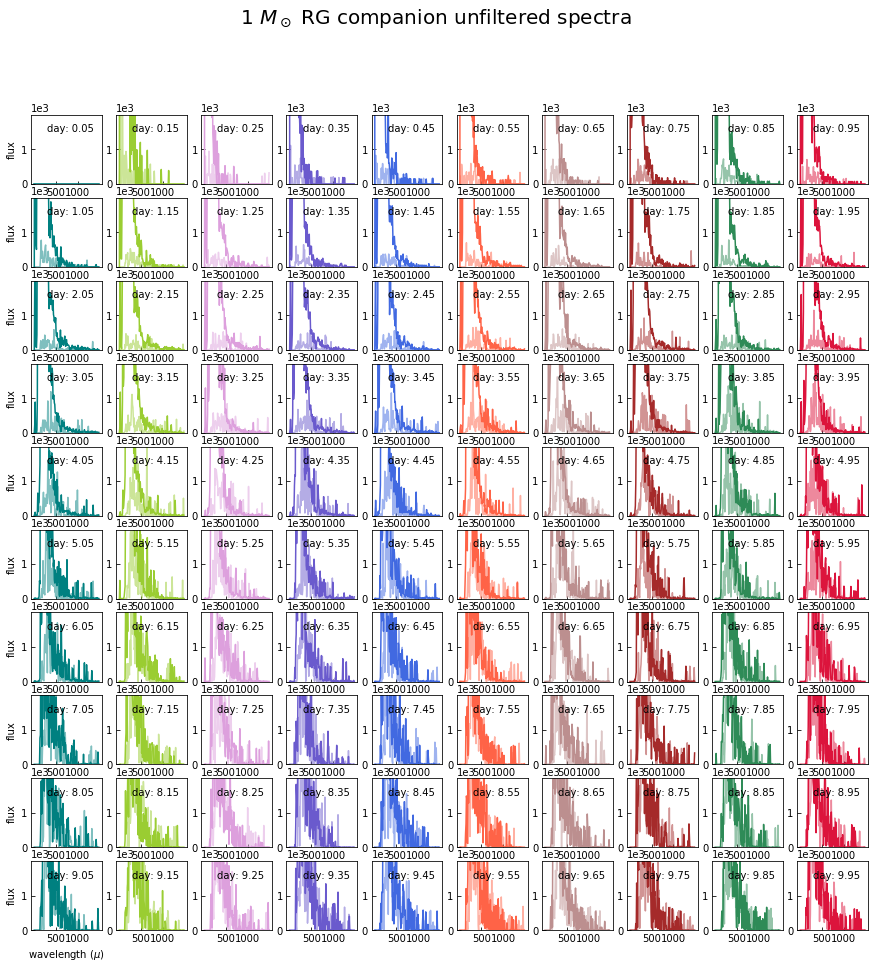

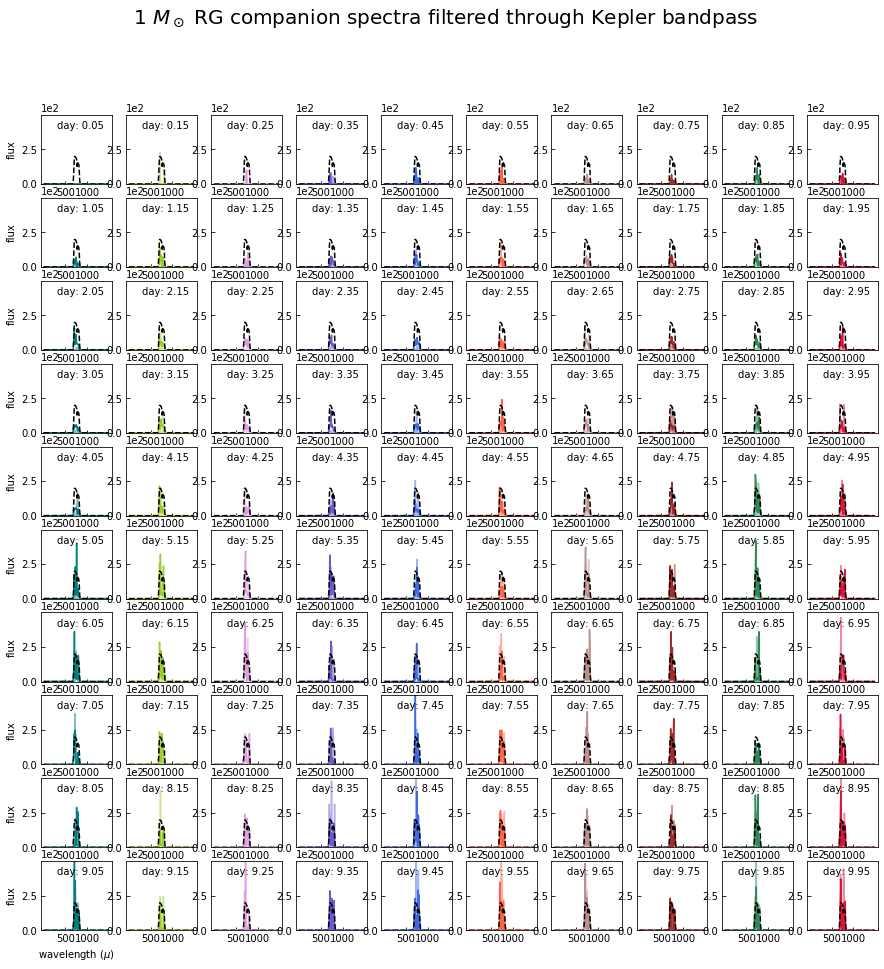

In [51]:
print ("1 M_sun RG companion")
print ("each phase is lpottted in a box in each plot arrays")
print ("for each phase the spectrum at the narrowest and largest viewing angles are plotted") 
print ("(only the narrowest is visible thought due to scaling)") 


fig1=pl.figure(figsize=(15, 15))  
fig1.suptitle(r"1 $M_\odot$ RG companion unfiltered spectra", fontsize=20)
fig2=pl.figure(figsize=(15, 15))
fig2.suptitle(r"1 $M_\odot$ RG companion spectra filtered through Kepler bandpass", 
              fontsize=20)
lcva2e13={'epoch':[], 'flux':{}}
for mu in angles:
    lcva2e13['flux'][mu] = []
    
for t, epoch in enumerate(np.arange(0.05, 10.0, 0.1)):
    lcva2e13['epoch'].append(epoch)
    a2e13spectra = {'w': np.arange(51, 14852, 100)}
    allspectrafiles = np.array(glob.glob(spdir + "/optical_t%06.2f_I3.spec.*"%epoch))

    for mu in angles:
        thisf= [ff.strip()  for ff in allspectrafiles if '%.4f'%mu in ff]
        a2e13spectra[mu] = np.loadtxt(thisf[0], usecols=(1,))

    ax1=fig1.add_subplot(10, 10, t+1)
    ax2=fig2.add_subplot(10, 10, t+1)            
    ax1.text(300, 1500, "day: %.2f"%epoch)
    ax2.text(300, 400, "day: %.2f"%epoch)

    for k in a2e12spectra:
        if k == 'w':
            continue
            
        if k == 167.1616:    
            ax1.plot(a2e13spectra['w'] * 0.1,
                     a2e13spectra[k], alpha=0.5, color=allcolors[t%10])
            ax2.plot(a2e13spectra['w'] * 0.1,
                     a2e13spectra[k] * filtfunc[f](a2e13spectra['w']),
                     alpha=0.5, color=allcolors[t%10])

        if k == 12.8386:    
            ax1.plot(a2e13spectra['w'] * 0.1,
                     a2e13spectra[k],
                     alpha=1.0, color=allcolors[t%10])
            ax2.plot(a2e13spectra['w'] * 0.1,
                     a2e13spectra[k] * filtfunc[f](a2e13spectra['w']),
                     alpha=1, color=allcolors[t%10])
  
        #integrating under the filter to get the lightcurve datapoint
        lcva2e13['flux'][k].append(sum(a2e13spectra[k] * filtfunc[f](a2e13spectra['w'])))
        
    ax1.set_ylim(0, 2000)
    ax1.set_yticks([0, 1000])
    ax1.set_xticks([500, 1000])
    #ax1.xaxis.set_major_formatter(formatter)
    ax1.yaxis.set_major_formatter(formatter)

    ax2.plot(a2e13spectra['w'] * 0.1, 500 * filtfunc[f](a2e13spectra['w']),
             'k--',alpha=1)
    ax2.set_ylim(0, 500)
    ax2.set_yticks([0, 250])
    ax2.set_xticks([500, 1000])
    #ax2.xaxis.set_major_formatter(formatter)
    ax2.yaxis.set_major_formatter(formatter)
    
    if (t) % 10 == 0:
        ax1.set_ylabel("flux")
        ax2.set_ylabel("flux")

    if (t) / 10 == 9:
        ax1.set_xlabel(r"wavelength ($\mu$)")
        ax2.set_xlabel(r"wavelength ($\mu$)")
        

Text(0.5,0,'days since explosion')

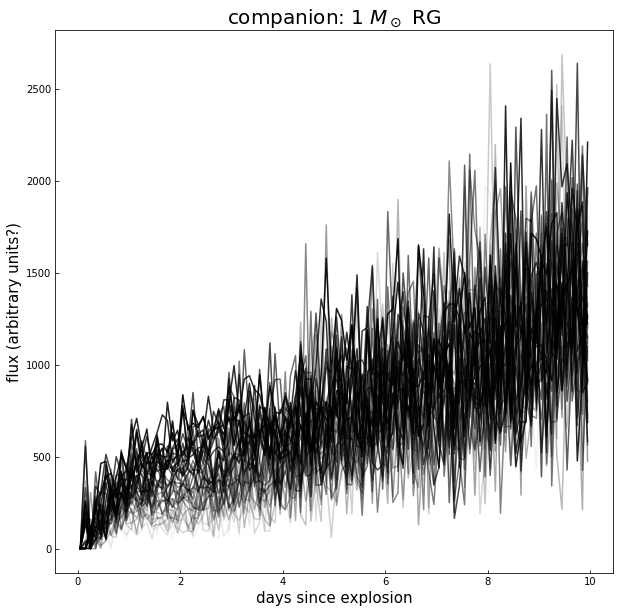

In [52]:
pl.figure(figsize=(10,10))
for i,mu in enumerate(angles):
    pl.plot(lcva2e13['epoch'], lcva2e13['flux'][mu], 'k', 
            alpha=1.0 - mu / max(angles))
pl.title(r"companion: 1 $M_\odot$ RG", fontsize=20)
pl.ylabel("flux (arbitrary units?)", fontsize=15)
pl.xlabel("days since explosion", fontsize=15)


printing file out

In [53]:
lcvs = {'phase': lcva2e13['epoch']}
for mu in angles:
    lcvs[mu] = lcva2e13['flux'][mu]
lcvs = pd.DataFrame(lcvs)

In [54]:
lcvs.to_csv("%s_%s.csv"%(dist, f), index=False)
pd.read_csv("%s_%s.csv"%(dist, f)).head()

,phase,167.1616,157.6685,151.0451,145.5886,140.8052,136.469,132.4543,128.6823,125.0997,...,58.3318,54.9004,51.3179,47.5459,43.5312,39.195,34.4115,28.955,22.3317,12.8386
0,0.05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.15,335.518758,129.873126,212.221307,99.202114,214.346204,218.959557,0.563812,0.323528,294.011158,...,0.744900,164.759695,557.721159,4.518285,0.000000,205.325817,261.106203,4.012619,251.260036,0.831629
2,0.25,101.438721,249.828229,0.528769,105.609628,115.103024,0.028282,0.422202,0.000000,0.000000,...,0.000000,34.181768,0.000000,0.215497,89.333240,103.605279,93.069694,123.310249,0.000000,109.269327
3,0.35,262.165367,77.182930,143.811088,3.395005,172.235407,113.800507,43.849618,37.663598,50.364689,...,111.026992,261.338901,252.186679,338.136445,193.329399,92.471078,164.849886,117.577045,247.347992,211.684017
4,0.45,103.902545,49.462504,281.399495,63.373457,102.747906,111.161909,190.234524,66.858446,58.964485,...,158.750907,49.186594,307.548981,291.143557,312.223682,296.705539,240.870376,100.431794,75.163475,463.286069


### now, the spectra are hella noisy, and so are the lightcurves!  $$ $$ so i am smoothing them. smoothing window is ~1 day

//anaconda/envs/GEOP/lib/python3.6/site-packages/matplotlib/axes/_base.py:3449: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


Text(0.5,1,'smoothed lightcurves (log scale)')

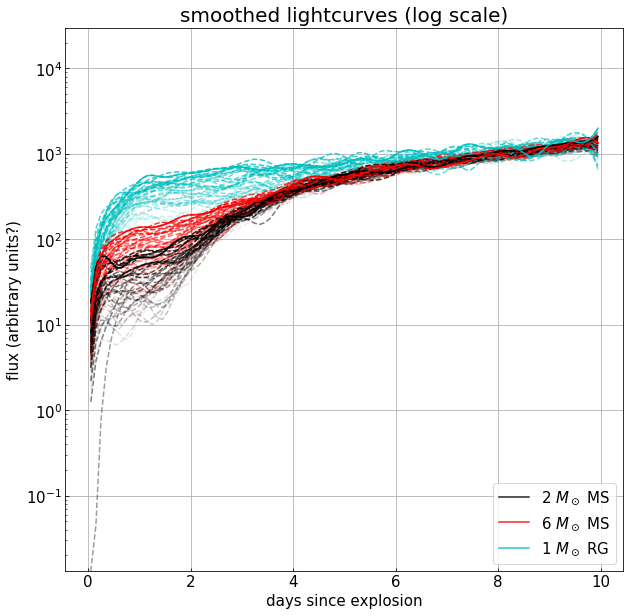

In [55]:
pl.figure(figsize=(10,10))
smoothed={'a5e11':{},'a2e12':{},'a2e13':{}}
for mu in angles:
    smoothed['a5e11'][mu] = smooth(np.array(lcva5e11['flux'][mu]),
                                   window_len=11)
    smoothed['a2e12'][mu] = smooth(np.array(lcva2e12['flux'][mu]),
                                   window_len=11)
    smoothed['a2e13'][mu] = smooth(np.array(lcva2e13['flux'][mu]),
                                   window_len=11)

for i,mu in enumerate(angles[:-1]):
    pl.plot(np.array(lcva5e11['epoch']), smoothed['a5e11'][mu], 'k--', 
            alpha=1.0 - mu / max(angles))
    pl.plot(np.array(lcva2e12['epoch']), smoothed['a2e12'][mu], 'r--', 
            alpha=1.0 - mu / max(angles))
    pl.plot(np.array(lcva2e13['epoch']), smoothed['a2e13'][mu], 'c--', 
            alpha=1.0 - mu / max(angles))
    
lastmu=angles[-2]
pl.plot(np.array(lcva5e11['epoch']), smoothed['a5e11'][lastmu], 'k', 
        alpha=1.0 - lastmu / max(angles), label=r"2 $M_\odot$ MS")
pl.plot(np.array(lcva2e12['epoch']), smoothed['a2e12'][lastmu], 'r', 
        alpha=1.0 - lastmu / max(angles), label=r"6 $M_\odot$ MS")
pl.plot(np.array(lcva2e13['epoch']), smoothed['a2e13'][lastmu], 'c', 
        alpha=1.0 - lastmu / max(angles), label=r"1 $M_\odot$ RG")
pl.draw()
pl.grid()
pl.yscale('log')
pl.ylim(-10,3.0e4)
pl.tick_params(axis='both', which='major', labelsize=15)
pl.legend(loc=4,prop={'size':15})
pl.ylabel("flux (arbitrary units?)",fontsize=15)
pl.xlabel("days since explosion",fontsize=15)
pl.title("smoothed lightcurves (log scale)",fontsize=20)

//anaconda/envs/GEOP/lib/python3.6/site-packages/matplotlib/axes/_base.py:3449: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


Text(0.5,1,'smoothed lightcurves (log scale)')

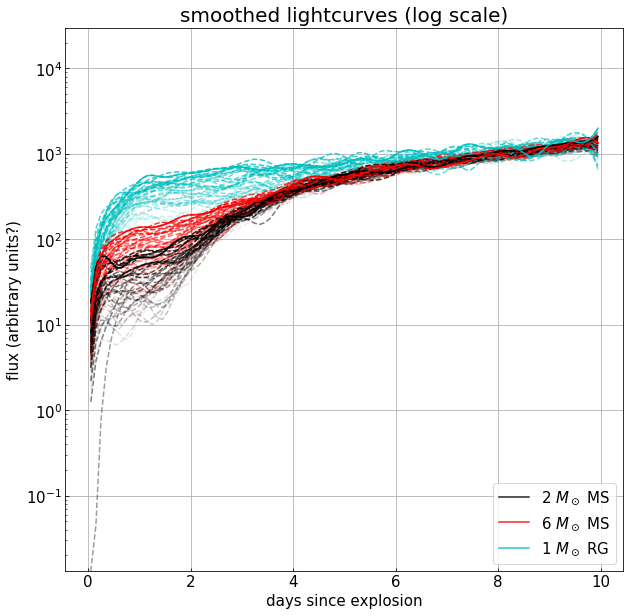

In [56]:
pl.figure(figsize=(10,10))
smoothed={'a5e11':{},'a2e12':{},'a2e13':{}}
for mu in angles:
    smoothed['a5e11'][mu] = smooth(np.array(lcva5e11['flux'][mu]),
                                   window_len=11)
    smoothed['a2e12'][mu] = smooth(np.array(lcva2e12['flux'][mu]),
                                   window_len=11)
    smoothed['a2e13'][mu] = smooth(np.array(lcva2e13['flux'][mu]),
                                   window_len=11)

for i,mu in enumerate(angles[:-1]):
    pl.plot(np.array(lcva5e11['epoch']), smoothed['a5e11'][mu], 'k--', 
            alpha=1.0 - mu / max(angles))
    pl.plot(np.array(lcva2e12['epoch']), smoothed['a2e12'][mu], 'r--', 
            alpha=1.0 - mu / max(angles))
    pl.plot(np.array(lcva2e13['epoch']), smoothed['a2e13'][mu], 'c--', 
            alpha=1.0 - mu / max(angles))
    
lastmu=angles[-2]
pl.plot(np.array(lcva5e11['epoch']), smoothed['a5e11'][lastmu], 'k', 
        alpha=1.0 - lastmu / max(angles), label=r"2 $M_\odot$ MS")
pl.plot(np.array(lcva2e12['epoch']), smoothed['a2e12'][lastmu], 'r', 
        alpha=1.0 - lastmu / max(angles), label=r"6 $M_\odot$ MS")
pl.plot(np.array(lcva2e13['epoch']), smoothed['a2e13'][lastmu], 'c', 
        alpha=1.0 - lastmu / max(angles), label=r"1 $M_\odot$ RG")
pl.draw()
pl.grid()
pl.yscale('log')
pl.ylim(-10,3.0e4)
pl.tick_params(axis='both', which='major', labelsize=15)
pl.legend(loc=4,prop={'size':15})
pl.ylabel("flux (arbitrary units?)",fontsize=15)
pl.xlabel("days since explosion",fontsize=15)
pl.title("smoothed lightcurves (log scale)",fontsize=20)

printing smoothed spectra out

In [57]:
for dist in ['a5e11','a2e12','a2e13']:
    lcvs = {'phase': lcva5e11['epoch']}
    for mu in angles:
        lcvs[mu] = smoothed[dist][mu]
    lcvs = pd.DataFrame(lcvs)
    lcvs.to_csv("%s_%s_smoothed.csv"%(dist, f), index=False)
    
    

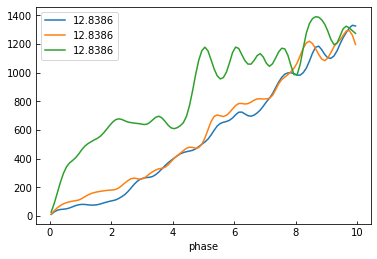

In [58]:
ax = pl.figure().add_subplot(111)
for dist in ['a5e11','a2e12','a2e13']:
    pd.read_csv("%s_%s_smoothed.csv"%(dist, f)).plot(x="phase", y="12.8386", ax=ax)

## IMPORTANT: the shape of the lightcurve is weird. what we really want to characterize is the excess due to the companion, so in a way the intrinsic shape does not matter.  $$ $$ for a low mass companion at a large angle there is no excess. By removing the lightcurve derived above for the lesser mass companion for the largest viewing angle I am essencially removing the flux of the explosion in absense of this shock breakout excess.  $$ $$ This is therefore what you want to compate to the residual of your power law lightcurve rise fit. 

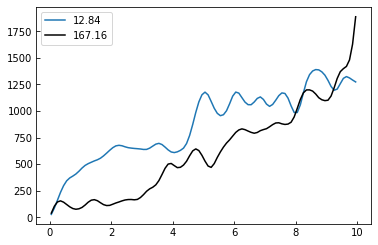

In [59]:
pl.plot(np.array(lcva2e13['epoch']), 
            smoothed['a2e13'][angles[-1]], label="%.2f"%angles[-1])
pl.plot(np.array(lcva2e13['epoch']), smoothed['a2e13'][angles[0]], 'k', 
            label="%.2f"%angles[0])
pl.legend()

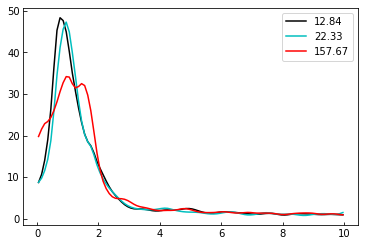

In [60]:
pl.plot(np.array(lcva2e13['epoch']), 
            smoothed['a2e13'][angles[-1]] / smoothed['a5e11'][angles[0]], 'k', 
            label="%.2f"%angles[-1])
pl.plot(np.array(lcva2e13['epoch']), 
            smoothed['a2e13'][angles[-2]] / smoothed['a5e11'][angles[0]], 'c', 
            label="%.2f"%angles[-2])
pl.plot(np.array(lcva2e13['epoch']), 
            smoothed['a2e13'][angles[-1]] / smoothed['a5e11'][angles[1]], 'r', 
            label="%.2f"%angles[1])
pl.legend()

In [61]:
smoothed['a2e13'][angles[-1]] / smoothed['a5e11'][angles[1]]

array([19.79590491, 21.57671923, 22.88378343, 23.39719176, 24.36743805,
       26.0228261 , 28.14241199, 30.59166076, 32.73040556, 34.19763214,
       34.08350954, 32.47613353, 31.47915575, 31.81328836, 32.50783737,
       32.04662205, 29.75778749, 26.00084434, 20.99367102, 15.86099215,
       11.76982034,  9.0274589 ,  7.25198251,  6.05735914,  5.28640198,
        4.92628331,  4.84255301,  4.81478975,  4.67934552,  4.38016314,
        3.95340911,  3.49621636,  3.13182102,  2.89833849,  2.75581592,
        2.61238371,  2.43335681,  2.23736633,  2.07090682,  1.9796826 ,
        1.96214228,  1.98853619,  2.01139625,  2.008173  ,  2.04321814,
        2.15254909,  2.30147084,  2.42207125,  2.42687481,  2.28150387,
        2.06475501,  1.842294  ,  1.65551651,  1.54166814,  1.49001167,
        1.47674693,  1.48258056,  1.50177791,  1.55275949,  1.62397492,
        1.66835027,  1.64508196,  1.55615322,  1.4608163 ,  1.39494603,
        1.37029554,  1.40112473,  1.47001437,  1.51644032,  1.49

In [62]:
smoothed['a2e13'][angles[-1]] / smoothed['a5e11'][angles[0]]

array([ 8.72339858, 10.67870504, 14.06544891, 19.01812479, 26.3662962 ,
       36.39305815, 45.35175386, 48.36205898, 47.6831365 , 44.99365513,
       40.25603737, 35.01087703, 30.70355623, 26.70658   , 23.19540137,
       20.35328264, 18.54558758, 17.55994101, 15.88548419, 13.78522046,
       12.12968995, 10.59692177,  9.08101578,  7.67910657,  6.50779931,
        5.59073761,  4.78500131,  4.03020481,  3.38545271,  2.90331322,
        2.57607947,  2.4000053 ,  2.35538209,  2.35670065,  2.32469898,
        2.22675613,  2.0814519 ,  1.94691326,  1.87570644,  1.88801959,
        1.97870645,  2.09223382,  2.12745279,  2.07559353,  2.04198648,
        2.0888871 ,  2.20840673,  2.34848209,  2.4481806 ,  2.45500303,
        2.34753518,  2.146087  ,  1.9009648 ,  1.66572675,  1.47787069,
        1.37012239,  1.34562038,  1.38439739,  1.47449344,  1.58648168,
        1.66704067,  1.6823186 ,  1.63419643,  1.57171566,  1.51280959,
        1.44183846,  1.36503727,  1.29360209,  1.22510918,  1.15

Text(0.5,1,'excess only time series')

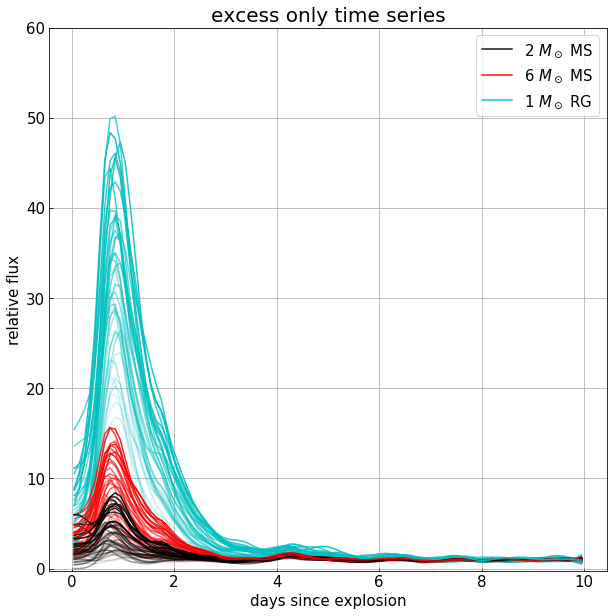

In [63]:
pl.figure(figsize=(10,10))
for i,mu in enumerate(angles[:-1]):
    pl.plot(np.array(lcva5e11['epoch']), 
            smoothed['a5e11'][mu] / smoothed['a5e11'][angles[0]], 'k', 
            alpha=1.0-mu/(angles[0])+0.01)
    pl.plot(np.array(lcva2e12['epoch']), 
            smoothed['a2e12'][mu] / smoothed['a5e11'][angles[0]], 'r', 
            alpha=1.0-mu/(angles[0])+0.01)
    pl.plot(np.array(lcva2e13['epoch']), 
            smoothed['a2e13'][mu] / smoothed['a5e11'][angles[0]], 'c', 
            alpha=1.0-mu/(angles[0])+0.01)
lastmu=angles[-1]
pl.plot(np.array(lcva5e11['epoch']), 
        smoothed['a5e11'][lastmu] / smoothed['a5e11'][angles[0]], 'k', 
        alpha=1.0-lastmu/(angles[0]), label="2 $M_\odot$ MS")
pl.plot(np.array(lcva2e12['epoch']), 
        smoothed['a2e12'][lastmu] / smoothed['a5e11'][angles[0]], 'r', 
        alpha=1.0-lastmu/(angles[0]), label="6 $M_\odot$ MS")
pl.plot(np.array(lcva2e13['epoch']), 
        smoothed['a2e13'][lastmu] / smoothed['a5e11'][angles[0]], 'c', 
        alpha=1.0-lastmu/(angles[0]), label="1 $M_\odot$ RG")
pl.draw()
pl.grid()
#pl.yscale('log')
pl.ylim(-0.3,60)
pl.tick_params(axis='both', which='major', labelsize=15)
pl.legend(prop={'size':15})
pl.ylabel("relative flux",fontsize=15)
pl.xlabel("days since explosion",fontsize=15)
pl.title("excess only time series",fontsize=20)

Text(0.5,1,'excess only time series')

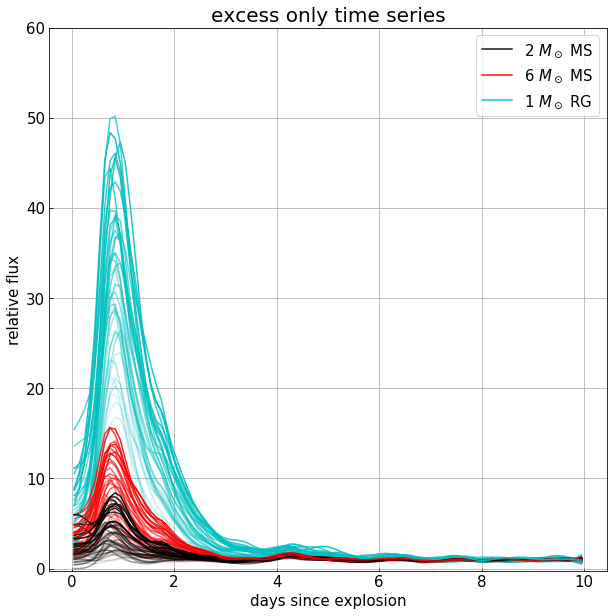

In [64]:
pl.figure(figsize=(10,10))
for i,mu in enumerate(angles[:-1]):
    pl.plot(np.array(lcva5e11['epoch']), 
            smoothed['a5e11'][mu] / smoothed['a5e11'][angles[0]], 'k', 
            alpha=1.0-mu/(angles[0])+0.01)
    pl.plot(np.array(lcva2e12['epoch']), 
            smoothed['a2e12'][mu] / smoothed['a5e11'][angles[0]], 'r', 
            alpha=1.0-mu/(angles[0])+0.01)
    pl.plot(np.array(lcva2e13['epoch']), 
            smoothed['a2e13'][mu] / smoothed['a5e11'][angles[0]], 'c', 
            alpha=1.0-mu/(angles[0])+0.01)
lastmu=angles[-1]
pl.plot(np.array(lcva5e11['epoch']), 
        smoothed['a5e11'][lastmu] / smoothed['a5e11'][angles[0]], 'k', 
        alpha=1.0-lastmu/(angles[0]), label="2 $M_\odot$ MS")
pl.plot(np.array(lcva2e12['epoch']), 
        smoothed['a2e12'][lastmu] / smoothed['a5e11'][angles[0]], 'r', 
        alpha=1.0-lastmu/(angles[0]), label="6 $M_\odot$ MS")
pl.plot(np.array(lcva2e13['epoch']), 
        smoothed['a2e13'][lastmu] / smoothed['a5e11'][angles[0]], 'c', 
        alpha=1.0-lastmu/(angles[0]), label="1 $M_\odot$ RG")
pl.draw()
pl.grid()
#pl.yscale('log')
pl.ylim(-0.3,60)
pl.tick_params(axis='both', which='major', labelsize=15)
pl.legend(prop={'size':15})
pl.ylabel("relative flux",fontsize=15)
pl.xlabel("days since explosion",fontsize=15)
pl.title("excess only time series",fontsize=20)

printing out vthe lightcurves

In [65]:
for dist in ['a5e11','a2e12','a2e13']:
    lcvs = {'phase': lcva5e11['epoch']}
    for mu in angles:
        lcvs[mu] = smoothed[dist][mu] / smoothed['a5e11'][angles[0]]
    lcvs = pd.DataFrame(lcvs)
    print(lcvs.head())
    lcvs.to_csv("%s_%s_smoothed_baselineremoved.csv"%(dist, f), index=False)
   

   phase  167.1616  157.6685  151.0451  145.5886  140.8052   136.469  \
0   0.05       1.0  0.440667  0.734878  0.593007  1.270453  1.698464   
1   0.15       1.0  0.494918  0.765146  0.598226  1.239581  1.667285   
2   0.25       1.0  0.614647  0.773820  0.578950  1.128402  1.513167   
3   0.35       1.0  0.812838  0.789177  0.544155  0.958807  1.320178   
4   0.45       1.0  1.082030  0.843126  0.544162  0.840808  1.179643   

   132.4543  128.6823  125.0997    ...      58.3318   54.9004   51.3179  \
0  0.938460  1.617359  1.925508    ...     4.758017  2.751775  2.542209   
1  0.929522  1.620066  1.945217    ...     4.711990  2.820579  2.621174   
2  0.895273  1.529081  1.900481    ...     4.415904  2.820843  2.795168   
3  0.899859  1.431441  1.853266    ...     3.935277  2.867302  3.156851   
4  1.054681  1.437885  1.895786    ...     3.615724  3.177420  3.849647   

    47.5459   43.5312    39.195   34.4115    28.955   22.3317   12.8386  
0  3.421309  2.115697  2.670064  3.688765 

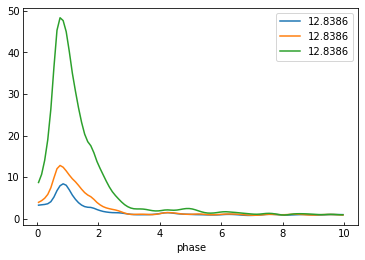

In [66]:
ax = pl.figure().add_subplot(111)
for dist in ['a5e11','a2e12','a2e13']:
    pd.read_csv("%s_%s_smoothed_baselineremoved.csv"%(dist, f)).plot(x="phase", y="12.8386", ax=ax)